In [1]:
from Nozzle_1D import Nozzle
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
tolerance = 1e-12

In [3]:
# Initialize MEDIUM ISENTROPIC CASE
MEDIUM_ISENTROPIC = Nozzle("inputs/Medium_inputs.nml")
MEDIUM_ISENTROPIC.CFL = .05
MEDIUM_ISENTROPIC.p_back = 120
# RUN MEDIUM SIMULATION
p_compute_Medium,u_compute_Medium,rho_compute_Medium,p_exact_Medium,\
    u_exact_Medium,rho_exact_Medium,convergence_history_Medium = MEDIUM_ISENTROPIC.RUN_SIMULATION(verbose = True,convergence_criteria=tolerance,jameson_damping = False,iter_max=400000,first_order=True)

Iteration: 1 1.0002932655386318
Iteration: 101 0.8904231483042755
Iteration: 201 0.7974517776719706
Iteration: 301 0.7238982100721065
Iteration: 401 0.665691511926637
Iteration: 501 0.6210335668036879
Iteration: 601 0.5975736802857803
Iteration: 701 0.5635554040069175
Iteration: 801 0.5440669092888921
Iteration: 901 0.5242562130606053
Iteration: 1001 0.4993561755677816
Iteration: 1101 0.46786555344404124
Iteration: 1201 0.4383679910627547
Iteration: 1301 0.4132823669258787
Iteration: 1401 0.4175198141585199
Iteration: 1501 3.969334847239373
Iteration: 1601 956.1305154221043
Iteration: 1701 12623.088307595563
Iteration: 1801 59147.390876053236
Iteration: 1901 179090.3330778346
Iteration: 2001 420498.67482996604
Iteration: 2101 830351.9415962457
Iteration: 2201 1438983.7813624823
Iteration: 2301 2241165.677189639
Iteration: 2401 3177468.3067633063
Iteration: 2501 4123758.233135065
Iteration: 2601 4908943.701081614
Iteration: 2701 5422575.643858347
Iteration: 2801 5985654.833500023
Iterat

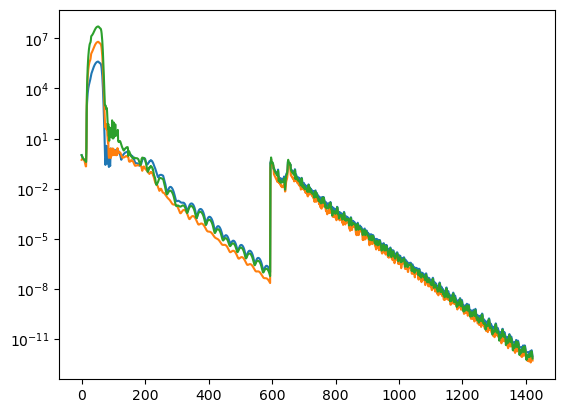

In [4]:
plt.semilogy(convergence_history_Medium)

Text(0, 0.5, 'Pressure (kPa)')

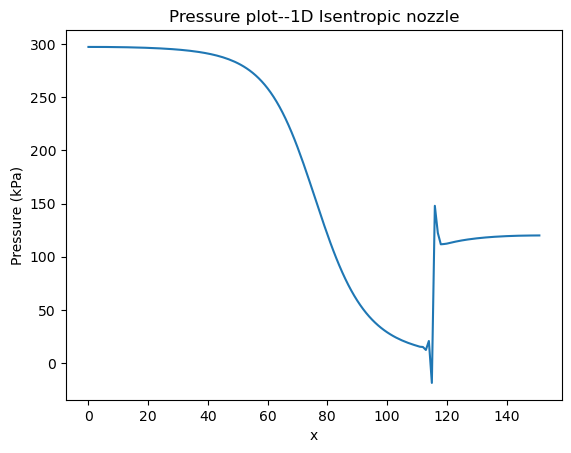

In [5]:
plt.plot(p_compute_Medium,"-")
plt.title("Pressure plot--1D Isentropic nozzle")
plt.xlabel(r"x")
plt.ylabel("Pressure (kPa)")

In [6]:
# Initialize MEDIUM ISENTROPIC CASE
MEDIUM_ISENTROPIC = Nozzle("inputs/Medium_inputs.nml")
MEDIUM_ISENTROPIC.CFL = .1
# RUN MEDIUM SIMULATION
p_compute_Medium,u_compute_Medium,rho_compute_Medium,p_exact_Medium,\
    u_exact_Medium,rho_exact_Medium,convergence_history_Medium = MEDIUM_ISENTROPIC.RUN_SIMULATION(verbose = True,convergence_criteria=tolerance,jameson_damping = False,iter_max=100000,first_order=False)

Iteration: 1 1.0048102774827796
Iteration: 101 0.825912088210611
Iteration: 201 0.6898878911862525
Iteration: 301 0.6110674975564816
Iteration: 401 0.5789969813529424
Iteration: 501 0.5489756083759859
Iteration: 601 0.4813198511349792
Iteration: 701 0.4326937243222562
Iteration: 801 0.8773215480000652
Iteration: 901 3.8787814180334172
Iteration: 1001 2.13290256896571
Iteration: 1101 0.45506386086040623
Iteration: 1201 0.48721793783607764
Iteration: 1301 0.5446280905030518
Iteration: 1401 0.4083871690073293
Iteration: 1501 0.6403326776693808
Iteration: 1601 1.8316340418241221
Iteration: 1701 2.104098853924384
Iteration: 1801 1.2333689786558726
Iteration: 1901 2.1273364796349172
Iteration: 2001 2.0237756887642218
Iteration: 2101 3.3004705902884424
Iteration: 2201 2.2457659954179423
Iteration: 2301 2.0285693034974686
Iteration: 2401 2.09866258919929
Iteration: 2501 2.9250633314008447
Iteration: 2601 2.5653171894619935
Iteration: 2701 1.9440587301800216
Iteration: 2801 1.3256513072346605
I

/home/aaron99/anaconda3/envs/PyTorch/lib/python3.11/site-packages/numpy/linalg/linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/home/aaron99/src/CFD/AOE_6145/CFD/CFD_HW4/Nozzle_1D.py:244: RuntimeWarning: divide by zero encountered in divide
  r_plus_upwind = (F[0:-4]-F[1:-3])/self.min_func(F[1:-3]-F[2:-2])
/home/aaron99/src/CFD/AOE_6145/CFD/CFD_HW4/Nozzle_1D.py:245: RuntimeWarning: divide by zero encountered in divide
  r_minus_upwind = (F[2:-2]-F[3:-1])/self.min_func(F[1:-3]-F[2:-2])
/home/aaron99/src/CFD/AOE_6145/CFD/CFD_HW4/Nozzle_1D.py:247: RuntimeWarning: divide by zero encountered in divide
  r_plus_central = ((F[3:-1]-F[2:-2]))/self.min_func(F[2:-2]-F[1:-3])
/home/aaron99/src/CFD/AOE_6145/CFD/CFD_HW4/Nozzle_1D.py:248: RuntimeWarning: divide by zero encountered in divide
  r_minus_central = ((F[3:-1]-F[0:-4]))/self.min_func(F[2:-2]-F[1:-3])
/home/aaron99/src/CFD/AOE_6145/CFD/CFD_HW4/Nozzle_1D.py:263: RuntimeWarning: divide by zero encoun

Iteration: 6201 nan
Iteration: 6301 nan
Iteration: 6401 nan
Iteration: 6501 nan
Iteration: 6601 nan
Iteration: 6701 nan
Iteration: 6801 nan
Iteration: 6901 nan
Iteration: 7001 nan
Iteration: 7101 nan
Iteration: 7201 nan
Iteration: 7301 nan
Iteration: 7401 nan
Iteration: 7501 nan
Iteration: 7601 nan
Iteration: 7701 nan
Iteration: 7801 nan
Iteration: 7901 nan
Iteration: 8001 nan
Iteration: 8101 nan
Iteration: 8201 nan
Iteration: 8301 nan
Iteration: 8401 nan
Iteration: 8501 nan
Iteration: 8601 nan
Iteration: 8701 nan
Iteration: 8801 nan
Iteration: 8901 nan
Iteration: 9001 nan
Iteration: 9101 nan
Iteration: 9201 nan
Iteration: 9301 nan
Iteration: 9401 nan
Iteration: 9501 nan
Iteration: 9601 nan
Iteration: 9701 nan
Iteration: 9801 nan
Iteration: 9901 nan
Iteration: 10001 nan
Iteration: 10101 nan
Iteration: 10201 nan
Iteration: 10301 nan
Iteration: 10401 nan
Iteration: 10501 nan
Iteration: 10601 nan
Iteration: 10701 nan
Iteration: 10801 nan
Iteration: 10901 nan
Iteration: 11001 nan
Iteration

KeyboardInterrupt: 

In [ ]:
temp = (MEDIUM_ISENTROPIC.NI-1)//2
plt.plot(MEDIUM_ISENTROPIC.x[temp-2:temp+3],rho_compute_Medium[temp-2:temp+3],"-o")
plt.title("Pressure plot--1D Isentropic nozzle")
plt.xlabel(r"x")
plt.ylabel("Pressure (kPa)")

In [ ]:
plt.plot(MEDIUM_ISENTROPIC.x[1:],np.sqrt(p_compute_Medium[1:-1]/rho_compute_Medium[1:-1]))
plt.title("Pressure plot--1D Isentropic nozzle")
plt.xlabel(r"x")
plt.ylabel("Pressure (kPa)")

In [ ]:
convergence_history_Medium

In [ ]:
plt.semilogy(convergence_history_Medium)

# Add labels and title
plt.xlabel('Iterations (100x)')
plt.ylabel('Error (log scale)')
plt.title('Convergence History (Isentropic)')

# Add legend
plt.legend(["Density", "Velocity", "Pressure"])

# Add grid for better readability
plt.grid(True, which="both", linestyle="--", linewidth=0.7)

In [ ]:
# Initialize MEDIUM NON-ISENTROPIC CASE
MEDIUM_NON_ISENTROPIC = Nozzle("inputs/Medium_inputs.nml")

# Manually change back pressure
MEDIUM_NON_ISENTROPIC.p_back = 120 #kPa

# RUN MEDIUM SIMULATION
p_compute_Medium,u_compute_Medium,rho_compute_Medium,p_exact_Medium,\
    u_exact_Medium,rho_exact_Medium,convergence_history_Medium = MEDIUM_NON_ISENTROPIC.RUN_SIMULATION(verbose = True,convergence_criteria=tolerance)

In [ ]:
plt.plot(MEDIUM_NON_ISENTROPIC.x[1:],p_compute_Medium[1:-1])
plt.title("Pressure plot--1D nozzle with shocks")
plt.xlabel(r"x")
plt.ylabel("Pressure (kPa)")

In [ ]:
plt.semilogy(convergence_history_Medium)

# Add labels and title
plt.xlabel('Iterations (100x)')
plt.ylabel('Error (log scale)')
plt.title('Convergence History (Non-Isentropic)')

# Add legend
plt.legend(["Density", "Velocity", "Pressure"])

# Add grid for better readability
plt.grid(True, which="both", linestyle="--", linewidth=0.7)

In [ ]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla

def poisson_2d(n):
    h = 1 / (n + 1)  # Grid spacing
    N = n * n  # Total unknowns

    # Discrete Laplacian operator (5-point stencil)
    main_diag = 4 * np.ones(N)
    off_diag = -1 * np.ones(N - 1)
    off_diag[np.arange(1, N) % n == 0] = 0  # Fix for boundaries
    far_off_diag = -1 * np.ones(N - n)

    A = sp.diags([main_diag, off_diag, off_diag, far_off_diag, far_off_diag], 
                 [0, -1, 1, -n, n], shape=(N, N), format="csr")

    # Right-hand side (forcing term, f)
    x = np.linspace(h, 1 - h, n)
    y = np.linspace(h, 1 - h, n)
    X, Y = np.meshgrid(x, y, indexing="ij")
    F = np.sin(np.pi * X) * np.sin(np.pi * Y)  # Example forcing function
    b = (h ** 2) * F.ravel()  # Flatten to 1D

    # Solve the linear system
    u = spla.spsolve(A, b)

    # Reshape solution back to (n, n)
    return u.reshape((n, n))

# Example: Solve for a 10x10 grid
solution = poisson_2d(100)
plt.imshow(solution)